# Handwritting Recognition:
# Elizaveta Sokolova 



# ___________________________________________
#  Handwriting Recognition Using ANN

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics


%matplotlib inline

# a)

In [8]:
my_digits = []
for i in range(0,1797):
    file_name = "/Users/elizavetasokolova/Desktop/HW2/Digit/" + str(i) + ".jpg"
    my_digits.append(mpimg.imread(file_name))

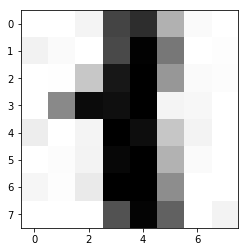

In [9]:
#show the second image
plt.imshow(my_digits[1], cmap=plt.cm.gray_r, interpolation='nearest')

# b)

In [10]:
len(my_digits)

1797

In [11]:
import itertools
digits = []
for i in range(0, 1796):
    x = list(itertools.chain.from_iterable(my_digits[i]))
    digits.append(x)

In [12]:
df_digits = pd.DataFrame(digits)

In [13]:
df_digits.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,2,88,217,158,21,0,0,16,0,...,4,0,4,3,87,228,182,0,9,2
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,0,0,172,251,157,0,12
2,0,0,5,59,240,199,2,0,5,0,...,92,0,0,11,0,54,173,255,138,0
3,6,0,108,255,213,13,10,0,2,131,...,168,1,0,0,118,217,226,159,0,3
4,0,6,0,34,160,7,7,0,5,0,...,7,0,0,0,2,42,250,51,0,4


In [17]:
df_label = pd.read_csv("/Users/elizavetasokolova/Desktop/HW2//label.csv")
df_label.shape

(1797, 2)

In [18]:
labels = df_label['digit']
labels

0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10      0
11      1
12      2
13      3
14      4
15      5
16      6
17      7
18      8
19      9
20      0
21      1
22      2
23      3
24      4
25      5
26      6
27      7
28      8
29      9
       ..
1767    4
1768    0
1769    5
1770    3
1771    6
1772    9
1773    6
1774    1
1775    7
1776    5
1777    4
1778    4
1779    7
1780    2
1781    8
1782    2
1783    2
1784    5
1785    7
1786    9
1787    5
1788    4
1789    8
1790    8
1791    4
1792    9
1793    0
1794    8
1795    9
1796    8
Name: digit, Length: 1797, dtype: int64

In [19]:
df_digits[64] = labels

In [20]:
df_digits.head()



,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,2,88,217,158,21,0,0,16,0,...,0,4,3,87,228,182,0,9,2,0
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,0,172,251,157,0,12,1
2,0,0,5,59,240,199,2,0,5,0,...,0,0,11,0,54,173,255,138,0,2
3,6,0,108,255,213,13,10,0,2,131,...,1,0,0,118,217,226,159,0,3,3
4,0,6,0,34,160,7,7,0,5,0,...,0,0,0,2,42,250,51,0,4,4


In [21]:
df_digits.columns = df_digits.columns.astype(str)

In [22]:
feature_cols = list(range(64))

In [23]:
feature_cols = list(map(lambda x : str(x), feature_cols))

In [25]:
X = df_digits[feature_cols]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,2,88,217,158,21,0,0,16,0,...,4,0,4,3,87,228,182,0,9,2
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,0,0,172,251,157,0,12
2,0,0,5,59,240,199,2,0,5,0,...,92,0,0,11,0,54,173,255,138,0
3,6,0,108,255,213,13,10,0,2,131,...,168,1,0,0,118,217,226,159,0,3
4,0,6,0,34,160,7,7,0,5,0,...,7,0,0,0,2,42,250,51,0,4


In [27]:
y = df_digits['64']
y.head()

0    0
1    1
2    2
3    3
4    4
Name: 64, dtype: int64

# c)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)



# d)

In [30]:
my_ANN = MLPClassifier(hidden_layer_sizes=(80,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)
my_ANN.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80,), learning_rate='constant',
       learning_rate_init=0.002, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [31]:
# Weights:
print(my_ANN.coefs_)

[array([[-0.03108507,  0.05535598, -0.10344313, ...,  0.02784709,
         0.0825046 ,  0.09423843],
       [ 0.0698235 , -0.03680347,  0.02531218, ..., -0.08548486,
         0.13431358, -0.00890143],
       [-0.08512366,  0.00701341,  0.0517199 , ..., -0.03931432,
         0.0084345 , -0.00750768],
       ..., 
       [-0.11242577,  0.05533088, -0.14202023, ...,  0.16407871,
         0.11457407,  0.0420623 ],
       [-0.07166422, -0.03265562, -0.13267241, ...,  0.0691162 ,
         0.04956646,  0.01864882],
       [-0.07492904,  0.06047465, -0.09970874, ...,  0.16873773,
         0.07970479,  0.18755002]]), array([[ 0.06890649, -0.0193346 , -0.04462959,  0.01592586, -0.04940631,
        -0.11814053, -0.07778388, -0.06851535,  0.12406917,  0.05942455],
       [ 0.05478182,  0.21129084, -0.09314276,  0.06211205, -0.48712177,
         0.06060247,  0.16494833, -0.44675292,  0.15779203,  0.19072966],
       [-0.2870331 ,  0.16205047, -0.24328915, -0.2827384 ,  0.33378543,
         0.283500

In [32]:
# Bias weights:
print(my_ANN.intercepts_)

[array([-0.00970753, -0.03952583,  0.07558775,  0.08216994,  0.07410616,
        0.09853268,  0.04689489,  0.1041507 ,  0.01369264,  0.06319414,
        0.05690763, -0.02403036, -0.09624671,  0.07333257,  0.02544948,
       -0.07536803, -0.08289986,  0.02385729, -0.01307052, -0.06166755,
       -0.09891415,  0.01753198, -0.09785181, -0.07406244,  0.00837546,
       -0.1117778 , -0.03984501, -0.12647598, -0.09588616,  0.10028841,
       -0.00476433,  0.05005737, -0.000579  ,  0.06033293,  0.10756767,
        0.0755009 ,  0.00380724,  0.06733592,  0.06910556,  0.09137126,
       -0.09387073,  0.00387515, -0.13549959,  0.08124893,  0.08919189,
       -0.00292473,  0.03739603,  0.05447738, -0.06707481, -0.02418146,
       -0.04992246,  0.02764805,  0.09500913, -0.03796712, -0.09466169,
        0.04924251,  0.02722293, -0.05098715, -0.03556285,  0.11917111,
        0.07594908, -0.0907419 ,  0.05237582,  0.11847523,  0.08633205,
        0.07349713, -0.01048847, -0.06836862,  0.06945217,  0.0

In [33]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)

[4 0 8 6 5 1 0 4 5 6 5 7 6 1 4 5 6 7 2 7 5 6 5 1 5 2 9 5 5 4 5 6 4 4 0 9 9
 8 4 6 8 2 5 7 4 6 9 5 1 0 0 1 9 7 3 3 3 1 8 8 8 7 5 2 7 1 7 5 3 4 3 0 3 2
 9 3 3 9 8 7 2 8 5 3 8 7 6 4 6 2 8 4 0 1 5 3 5 7 5 8 2 2 6 4 3 4 3 7 3 9 4
 7 0 3 5 1 5 5 3 9 2 7 3 2 0 8 1 7 2 1 5 3 5 3 3 7 9 8 3 2 2 7 3 1 6 7 2 2
 3 4 3 6 4 8 2 1 8 8 8 3 5 3 9 5 5 7 7 4 8 9 3 7 6 9 7 0 4 0 0 9]


In [34]:
score_ann = accuracy_score(y_test, y_predict_ann)
print(score_ann)

0.944444444444


### Confussion Matrix 

In [35]:
from sklearn import metrics

cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)

print("Confusion matrix:")
print(cm_ANN)



Confusion matrix:
[[12  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  1  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  1  0  1]
 [ 0  0  0  0  0 25  0  0  0  0]
 [ 0  1  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  1  1  0  1  0  0  0 16  0]
 [ 0  0  0  0  0  1  0  1  1 13]]


In [36]:
from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(50,200)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                           learning_rate_init = 0.002)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(50,), (51,), (52,), (53,), (54,), (55,), (56,), (57,), (58,), (59,), (60,), (61,), (62,), (63,), (64,), (65,), (66,), (67,), (68,), (69,), (70,), (71,), (72,), (73,), (74,), (75,), (76,), (77,), (78,), (79,), (80,), (81,), (82,), (83,), (84,), (85,), (86,), (87,), (88,), (89,), (90,), (91,), (92,), (93,), (94,), (95,), (96,), (97,), (98,), (99,), (100,), (101,), (102,), (103,), (104,), (105,), (106,), (107,), (108,), (109,), (110,), (111,), (112,), (113,), (114,), (115,), (116,), (117,), (118,), (119,), (120,), (121,), (122,), (123,), (124,), (125,), (126,), (127,), (128,), (129,), (130,), (131,), (132,), (133,), (134,), (135,), (136,), (137,), (138,), (139,), (140,), (141,), (142,), (143,), (144,), (145,), (146,), (147,), (148,), (149,), (150,), (151,), (152,), (153,), (154,), (155,), (156,), (157,), (158,), (159,), (160,), (161,), (162,), (163,), (164,), (165,), (166,), (167,), (168,), (169,), (170,), (171,), (172,), (173,), (174,), (175,), (176,), (177,), (1